In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

### Load data

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-01-25 23:57:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.16, 34.64.4.80, 2404:f340:10:1800::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.03s   

2021-01-25 23:57:23 (2.56 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [5]:
input_sequences = []

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

In [9]:
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

In [10]:
pred, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words)

In [14]:
model = tf.keras.models.Sequential()
model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
#model.add(Bidirectional(LSTM(100)))# Another LSTM Layer
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Pick a loss function and an optimizer
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [15]:
history = model.fit(pred, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 14s 29ms/step - loss: 6.9143 - accuracy: 0.0188
Epoch 2/100
484/484 [==============================] - 13s 28ms/step - loss: 6.5047 - accuracy: 0.0217
Epoch 3/100
484/484 [==============================] - 13s 28ms/step - loss: 6.4043 - accuracy: 0.0255
Epoch 4/100
484/484 [==============================] - 14s 30ms/step - loss: 6.2782 - accuracy: 0.0292
Epoch 5/100
484/484 [==============================] - 13s 28ms/step - loss: 6.1920 - accuracy: 0.0319
Epoch 6/100
484/484 [==============================] - 13s 28ms/step - loss: 6.1230 - accuracy: 0.0380
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0504 - accuracy: 0.0407
Epoch 8/100
484/484 [==============================] - 13s 28ms/step - loss: 5.9784 - accuracy: 0.0455
Epoch 9/100
484/484 [==============================] - 13s 28ms/step - loss: 5.8889 - accuracy: 0.0513
Epoch 10/100
484/484 [==============================] - 13s 28ms/step - l

484/484 [==============================] - 13s 27ms/step - loss: 1.8310 - accuracy: 0.6712
Epoch 80/100
484/484 [==============================] - 14s 28ms/step - loss: 1.8207 - accuracy: 0.6657
Epoch 81/100
484/484 [==============================] - 14s 29ms/step - loss: 1.7831 - accuracy: 0.6787
Epoch 82/100
484/484 [==============================] - 15s 30ms/step - loss: 1.7699 - accuracy: 0.6786
Epoch 83/100
484/484 [==============================] - 13s 28ms/step - loss: 1.7545 - accuracy: 0.6828
Epoch 84/100
484/484 [==============================] - 12s 26ms/step - loss: 1.7323 - accuracy: 0.6886
Epoch 85/100
484/484 [==============================] - 12s 26ms/step - loss: 1.6921 - accuracy: 0.7025
Epoch 86/100
484/484 [==============================] - 14s 29ms/step - loss: 1.6902 - accuracy: 0.6984
Epoch 87/100
484/484 [==============================] - 13s 27ms/step - loss: 1.6577 - accuracy: 0.7053
Epoch 88/100
484/484 [==============================] - 13s 27ms/step - loss:

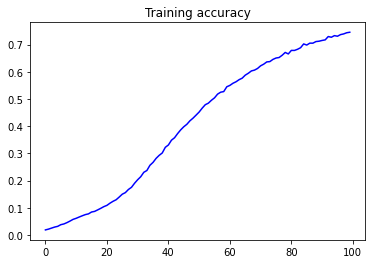

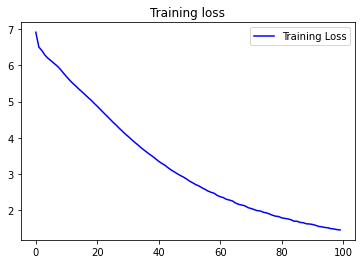

In [17]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [18]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope so view despair eyes torn tongue ' might true prove lie for me each o'er sight are character than strong delight had arising seen end faith out time out tongue faith out out o'er glory so great pleasure show thine eye will for thee that time of hearsay to sit prove argument despair eye time look time time of all thy will will decay rare prove heart tongue ' o'er prove deep eyes than place is have nature praise ' ill well confined lie to men prove thee you die die lie a dead grow well men grow men shown
